In [1]:
# take a look of the position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data = pd.read_csv('./data/labapp3-positions.txt', sep=' ', names=['nodeid','x','y'])

In [3]:
position_data=raw_data.copy()
# use the first columnas index
position_data.set_index('nodeid', inplace=True)

In [4]:
position_data

,x,y
nodeid,,
1,21.5,23
2,24.5,20
3,19.5,19
4,22.5,15
5,24.5,12
6,19.5,12
7,22.5,8
8,24.5,4
9,21.5,2


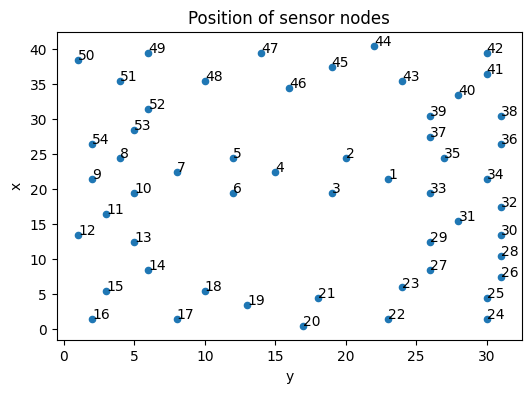

In [5]:
# scatter plot
plt.figure(figsize=(6,4))
plt.scatter(position_data['y'], position_data['x'], s=20)
plt.title('Position of sensor nodes')
plt.xlabel('y')
plt.ylabel('x')
# add labels
for i in position_data.index:
    plt.text(position_data.loc[i]['y'], position_data.loc[i]['x'], i)

In [11]:
# build a graph based on the position data
import networkx as nx

G = nx.Graph()

In [12]:
# add nodes
for i in position_data.index:
    G.add_node(i, pos=(position_data.loc[i]['y'], position_data.loc[i]['x']))

{1: Text(23.0, 21.5, '1'),
 2: Text(20.0, 24.5, '2'),
 3: Text(19.0, 19.5, '3'),
 4: Text(15.0, 22.5, '4'),
 5: Text(12.0, 24.5, '5'),
 6: Text(12.0, 19.5, '6'),
 7: Text(8.0, 22.5, '7'),
 8: Text(4.0, 24.5, '8'),
 9: Text(2.0, 21.5, '9'),
 10: Text(5.0, 19.5, '10'),
 11: Text(3.0, 16.5, '11'),
 12: Text(1.0, 13.5, '12'),
 13: Text(5.0, 12.5, '13'),
 14: Text(6.0, 8.5, '14'),
 15: Text(3.0, 5.5, '15'),
 16: Text(2.0, 1.5, '16'),
 17: Text(8.0, 1.5, '17'),
 18: Text(10.0, 5.5, '18'),
 19: Text(13.0, 3.5, '19'),
 20: Text(17.0, 0.5, '20'),
 21: Text(18.0, 4.5, '21'),
 22: Text(23.0, 1.5, '22'),
 23: Text(24.0, 6.0, '23'),
 24: Text(30.0, 1.5, '24'),
 25: Text(30.0, 4.5, '25'),
 26: Text(31.0, 7.5, '26'),
 27: Text(26.0, 8.5, '27'),
 28: Text(31.0, 10.5, '28'),
 29: Text(26.0, 12.5, '29'),
 30: Text(31.0, 13.5, '30'),
 31: Text(28.0, 15.5, '31'),
 32: Text(31.0, 17.5, '32'),
 33: Text(26.0, 19.5, '33'),
 34: Text(30.0, 21.5, '34'),
 35: Text(27.0, 24.5, '35'),
 36: Text(31.0, 26.5, '36'),

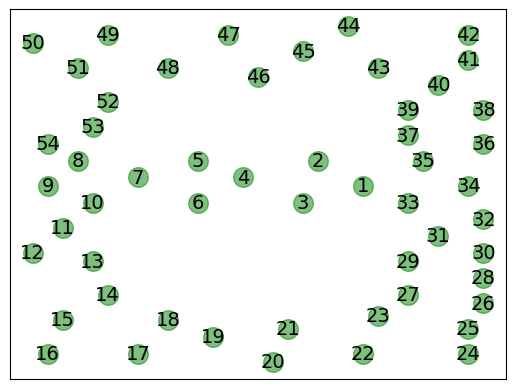

In [50]:
pos=nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos, with_labels=False, node_size=200, node_color='g',alpha=0.5, font_size=14)
nx.draw_networkx_labels(G, pos, font_size=14)



In [73]:
# create a distance matrix
from scipy.spatial.distance import pdist, squareform
position=np.array(position_data)
distance=squareform(pdist(position))
print(np.std(distance))



9.931029255364631


In [76]:
# similarity matrix
similarity=np.exp(-distance**2/(2*100))
print(similarity)

[[1.         0.91393119 0.90483742 ... 0.14298722 0.15489621 0.09729575]
 [0.91393119 1.         0.87809543 ... 0.2937577  0.299692   0.19398004]
 [0.90483742 0.87809543 1.         ... 0.20908801 0.2503238  0.18451952]
 ...
 [0.14298722 0.2937577  0.20908801 ... 1.         0.95122942 0.81464732]
 [0.15489621 0.299692   0.2503238  ... 0.95122942 1.         0.93706746]
 [0.09729575 0.19398004 0.18451952 ... 0.81464732 0.93706746 1.        ]]


Text(0.5, 1.0, 'Similarity matrix, $\\sigma=10$')

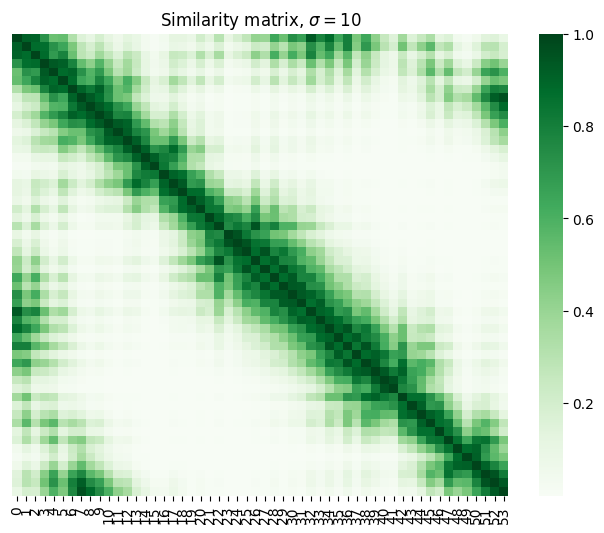

In [80]:
# plot the similarity matrix
plt.figure(figsize=(8,6))
sns.heatmap(similarity, cmap='Greens', xticklabels=True, yticklabels=False)
# add title
plt.title('Similarity matrix, $\sigma=10$')